### OpenCV 이미지처리


In [1]:
# ! pip install opencv-python
# ! pip install scikit-image
# ! pip install pillow

In [1]:
import cv2
from skimage import io
from PIL import Image
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

### PIL(Python Imaging Library)
PIL은 파이썬 인터프리터에 다양한 이미지 파일 형식을 지원하고 강력한 이미지 처리와 
그래픽 기능을 제공하는 자유-오픈 소스 소프트웨어 라이브러리이다

<class 'PIL.JpegImagePlugin.JpegImageFile'>


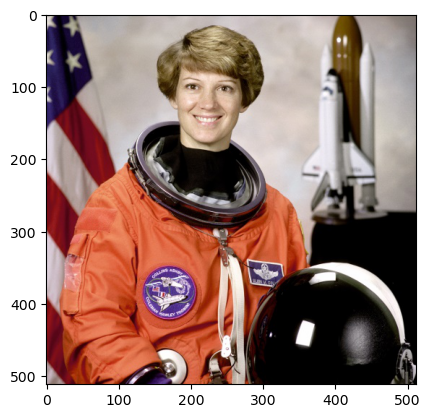

In [3]:
from PIL import Image

pil_image = Image.open('image.jpg')
print(type(pil_image))
plt.imshow(pil_image)  # 내부에 출력
pil_image.show()  # 외부 창으로 출력

### scikit-image
Python 프로그래밍 언어 용 오픈 소스 이미지 처리 라이브러리이다. 여기에는 세분화, 기하학적 변형, 색 공간 조작,
분석, 필터링, 형태학, 형상 감지 등의 알고리즘이 포함된다. 이것은 파이썬 수치 및 과학 라이브러리 인 NumPy 및 
SciPy와 상호 운용되도록 설계되었다.

<class 'numpy.ndarray'> (512, 512, 3)


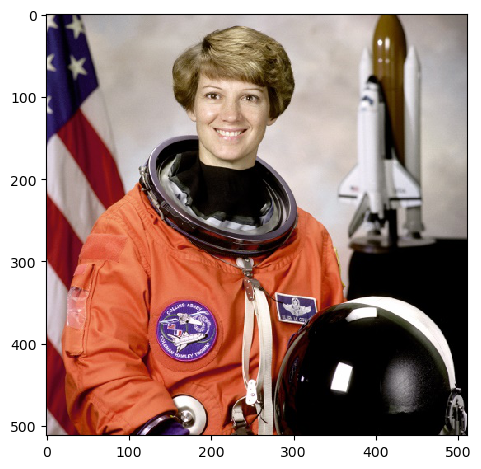

In [4]:
from skimage import io

sk_image = io.imread('image.jpg')
print(type(sk_image),sk_image.shape)
io.imshow(sk_image)

# OpenCV 이미지 처리
OpenCV는 Computer Vision 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 Open Library이다.<br>
OpenCV는 영상처리, 3D 구성, 추적, 기계학습, 인식 그리고 딥러닝까지 다양한 기능이 아주 많이 있다.
https://namu.wiki/w/OpenCV

* OpenCV는 원본 RGB 이미지를 BGR 형태의 넘파이 배열로 반환한다  
* OpenCV의 imwrite()를 이용한다면 BGR 형태의 이미지 배열을 파일에 기록할 때 다시 RGB형태로 변환하므로 사용자는 RGB->BGR->RGB 변환에 신경쓰지 않아도 된다(데이터 조작 시에 주의) 

In [5]:
cv2.__version__

'4.7.0'

In [8]:
cv_image = cv2.imread('image.jpg')
cv2.imshow("cv_image",cv_image)
cv2.waitKey()
cv2.destroyAllWindows()
# plt.imshow(cv_image)  # jupyter notebook에 출력하려면

In [12]:
sk_image = io.imread('image.jpg')
print(type(sk_image),sk_image.shape)
sk_image[:,:,0]

<class 'numpy.ndarray'> (512, 512, 3)


array([[150, 107,  67, ..., 128, 127, 126],
       [172, 143, 117, ..., 127, 125, 123],
       [196, 182, 167, ..., 128, 126, 123],
       ...,
       [188, 188, 186, ...,   0,   0,   0],
       [188, 188, 183, ...,   0,   5,   0],
       [186, 186, 182, ...,   1,   0,   0]], dtype=uint8)

In [17]:
cv2_image = cv2.imread('image.jpg')
print(type(cv2_image)) # <class 'numpy.ndarray'>
print(cv2_image.shape)
cv2_image[:,:,0]  # Blue

<class 'numpy.ndarray'>
(512, 512, 3)


array([[155, 116,  86, ..., 112, 111, 110],
       [176, 150, 130, ..., 111, 109, 107],
       [195, 183, 171, ..., 112, 110, 107],
       ...,
       [175, 175, 171, ...,   0,   0,   3],
       [174, 174, 168, ...,   0,   6,   2],
       [172, 172, 166, ...,   0,   0,   2]], dtype=uint8)

In [18]:
cv2_image[:,:,2]  # Red      # sk_image[:, :, 0]와 같은 값

array([[150, 107,  68, ..., 128, 127, 126],
       [173, 144, 117, ..., 127, 125, 123],
       [198, 184, 169, ..., 128, 126, 123],
       ...,
       [188, 186, 184, ...,   0,   0,   0],
       [188, 187, 183, ...,   0,   5,   0],
       [186, 186, 181, ...,   1,   0,   0]], dtype=uint8)

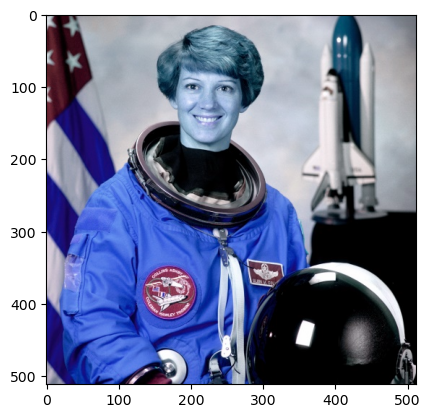

In [19]:
plt.imshow(cv2_image);  # Blue와 Red 색상이 반대로 나온다

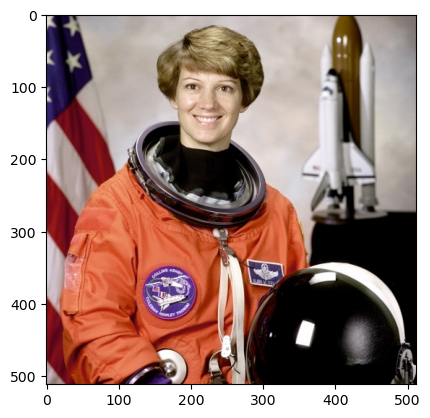

In [23]:
rgb_image = cv2.cvtColor(cv2_image,cv2.COLOR_BGR2RGB) # BGR을 RGB로 변경한다!!
plt.imshow(rgb_image);

### 색상변경 : cv2.cvtColor()

In [30]:
img = cv2.imread('image.jpg')

# 색상 변경 : gray
gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imwrite('gray_image.jpg',gray_img)
cv2.imshow("gray_image",gray_img)
cv2.waitKey()
cv2.destroyAllWindows()
print(cv2.COLOR_BGR2GRAY)  # 6

6


In [31]:
# 색상 변경 : hsv, hue(색조),saturation(채도),Value(명도)
# https://www.charlezz.com/?p=44906
hsv_img = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
cv2.imwrite('hsv_image.jpg',hsv_img)
cv2.imshow("hsv_image",hsv_img)
cv2.waitKey()
cv2.destroyAllWindows()
print(cv2.COLOR_BGR2HSV)  # 40

40


In [32]:
# 색상 변경 : YUV = YCbCr
# http://www.ktword.co.kr/test/view/view.php?m_temp1=3693
yuv_img = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
cv2.imwrite('yuv_image.jpg',yuv_img)
cv2.imshow("yuv_image",yuv_img)
cv2.waitKey()
cv2.destroyAllWindows()
print(cv2.COLOR_BGR2YUV)  # 82

82


### 크기조정 : cv2.resize()

In [35]:
img = cv2.imread('image.jpg')  # (512, 512, 3)
r,c = img.shape[:2]     
print('r:',r,'c:',c)  # r: 512 c: 512

r: 512 c: 512


In [47]:
# 이미지 2배 확대
# resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])
# https://docs.opencv.org/4.7.0/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d

new_image = cv2.resize(img,(2*r,2*c),interpolation=cv2.INTER_CUBIC)
cv2.imwrite('resize2_image.jpg',new_image)
cv2.imshow('resize2_image',new_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [41]:
# 이미지 1/2 축소
new_image = cv2.resize(img,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_AREA)
cv2.imwrite('resize1_2_image.jpg',new_image)
cv2.imshow('resize1_2_image',new_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [46]:
# 확대(1<fx) or 축소(1>fx) 모두 가능
new_image = cv2.resize(img,None,fx=0.1,fy=0.1) #interpolation=cv2.INTER_LINEAR
cv2.imwrite('resize_linear_image.jpg',new_image)
cv2.imshow('resize_linear__image',new_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [45]:
# 이미지 자르기
img = cv2.imread('image.jpg') 
img_crop = img[0:200,150:350]  # 잘라낼 세로,가로 영역
print(img_crop.shape)
cv2.imshow('crop_image',img_crop)
cv2.waitKey()
cv2.destroyAllWindows()

(200, 200, 3)


#### warpAffine
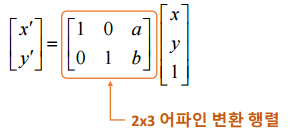

https://deep-learning-study.tistory.com/175

In [55]:
# 이동   ,warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])
# https://deep-learning-study.tistory.com/175
img = cv2.imread('image.jpg') 
r,c= img.shape[:2]
M = np.float32([[1,0,100],[0,1,100]]) # (2,3) Matrix
new_img = cv2.warpAffine(img,M,(c,r))
cv2.imshow('translation_image',new_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [61]:
# 회전 : getRotationMatrix2D(center, angle, scale)
img = cv2.imread('image.jpg') 
r,c= img.shape[:2]
M = cv2.getRotationMatrix2D((c/2,r/2),90,1) # 중심,회전각(CCW:Counter Clock Wise),크기비율
new_img = cv2.warpAffine(img,M,(c,r))
cv2.imshow('rotation_image',new_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [68]:
# 임계값 처리 : threshold(src, thresh, maxval, type[, dst]) 
img = cv2.imread('image.jpg')  # 512*512*3,(512,512,3)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
new_image = cv2.threshold(gray_img,120,255,cv2.THRESH_BINARY)
# 120 보다 큰값은 흰색으로 그외에는 검은색으로 출력
# 값이 작을수록 흰색이 많이 출력
# 값이 클수록 검은색이 많이 출력
cv2.imshow("threshold_image", new_image[1])
cv2.waitKey()
cv2.destroyAllWindows()

## Spatial Filtering 

In [77]:
# 필터 :합성곱 ,filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])
# https://deep-learning-study.tistory.com/142
img = cv2.imread('image.jpg')
ker = np.array([[1,1,1],[1,1,1],[1,1,1]]) # (3,3) 필터
# ker = np.array([[1,1,1],[1,1,1],[1,1,1]])/9. # 잡음 제거 필터
new_img = cv2.filter2D(img,-1,ker) # ddepth: 출력영상의 데이터 타입,-1은 src와 같은 타입
cv2.imshow("filter2D", new_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [2]:
# 가우시안 블러 : GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])
# https://deep-learning-study.tistory.com/144
img = cv2.imread('image.jpg')
cv2.imshow("original_image", img)
new_img = cv2.GaussianBlur(img,(5,5),0) # (5,5) : 반드시 양수 홀수이어야 한다,클수록 흐림
cv2.imshow('gaussian_image',new_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
# 중간값 블러 : medianBlur(src, ksize[, dst])
# https://deep-learning-study.tistory.com/163
img = cv2.imread('image.jpg')
cv2.imshow("original_image", img)
new_img = cv2.medianBlur(img,5) # 5:반드시 1보다 큰 홀수를 지정,클수록 흐림
cv2.imshow('median_image',new_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
# 침식: erode(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]])
# 두 물체를  축소시켜서 두 물체의 차이가 명확해지게 하거나, 노이즈를 제거
# https://diyver.tistory.com/61
img = cv2.imread('image.jpg')  # 512*512*3,(512,512,3)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("original_image", gray_img)
ker = np.ones((5,5),np.uint8)
new_img = cv2.erode(gray_img,ker,iterations=1) # iterations : 반복할 횟 수, 침식연산을 반복해서 적용한다. 너무 많이 반복하면 object가 다 없어져버릴 수 있다.
cv2.imshow('erosion_image',new_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [14]:
# 팽창 : dilate(src, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) 
# 작은 부분을 확대하려는 경우, 원하지 않는 틈/구멍을 메우고 싶을때
img = cv2.imread('image.jpg')  # 512*512*3,(512,512,3)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("original_image", gray_img)
ker = np.ones((5, 5), np.uint8)
new_img = cv2.dilate(gray_img, ker, iterations=1)
cv2.imshow("dilation_image", new_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [11]:
# 소벨 에지검출 : Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]])
# https://deep-learning-study.tistory.com/205
# 에지는 영상에서 픽셀의 밝기 값이 급격하게 변하는 부분
# 객체와 객체, 객체와 배경에 어떤 경계를 나타내는 용어
# 경계부분에는 픽셀값이 크게 변경된다고 가정하고 에지를 구한다
# 영상에 미분을 하는 이유는 에지를 검출하기 위함이다.
img = cv2.imread('image.jpg')  # 512*512*3,(512,512,3)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("original_image", gray_img)
x_edges = cv2.Sobel(gray_img,-1,1,0,ksize=5) # 1,0 : x축방향
cv2.imshow("x_edges_image", x_edges)
y_edges = cv2.Sobel(gray_img,-1,0,1,ksize=5) # 0,1 : y축방향
cv2.imshow("y_edges_image", y_edges)

cv2.waitKey()
cv2.destroyAllWindows()

In [12]:
# 캐니 에지검출: Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) 
# https://engineer-mole.tistory.com/243
img = cv2.imread('image.jpg')  # 512*512*3,(512,512,3)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("original_image", gray_img)
edges = cv2.Canny(gray_img,150,250,1) # min,max,aperture_size(=kernel_size)  ,  aperture:구멍
                                       # threshold1, threshold2 가 작을수록 더 조밀하게 검출한다
cv2.imshow("canny_image", edges) 

cv2.waitKey()
cv2.destroyAllWindows()

In [15]:
# 윤곽선 검출 : findContours(), drawContours()
# https://bkshin.tistory.com/entry/OpenCV-22-%EC%BB%A8%ED%88%AC%EC%96%B4Contour
# 컨투어(contour)는 등고선을 의미
# 등고선은 지형의 높이가 같은 영역을 하나의 선으로 표시한 것
# 영상에서 컨투어를 그리면 모양을 쉽게 인식할 수 있다
img = cv2.imread('image.jpg')  # 512*512*3,(512,512,3)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thresh_image = cv2.threshold(gray_img,127,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(thresh_image[1],cv2.RETR_TREE,\
                                       cv2.CHAIN_APPROX_SIMPLE )

cv2.drawContours(img,contours,-1,(255,0,0),2) # (B,G,R):윤곽선색상 ,  2: thickness
cv2.imshow("contour_image",img) 

cv2.waitKey()
cv2.destroyAllWindows()

In [31]:
# 템플릿 매칭 : matchTemplate(image, templ, method[, result[, mask]])
# https://deep-learning-study.tistory.com/242
img = cv2.imread('image.jpg')  # 512*512*3,(512,512,3)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_temp = cv2.imread('template.jpg') 
gray_temp = cv2.cvtColor(img_temp, cv2.COLOR_BGR2GRAY)
gray_temp.shape      # (193, 187)
w,h = gray_temp.shape[::-1]  # w :187, h b:193
output = cv2.matchTemplate(gray,gray_temp,cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(output)
min_val, max_val, min_loc, max_loc
top = max_loc
bottom =(top[0] + w, top[1] + h)
cv2.rectangle(img, top, bottom, 255, 2) # 255: Blue, 2:thickness
cv2.imshow('image',img)
cv2.waitKey()
cv2.destroyAllWindows()

# OpenCV 영상 처리
- OpenCV는 쉽게 비디오 영상처리를 할 수 있는 API를 제공한다
- VideoCapture 객체는 Video Streaming을 Frame 별로 Capture하여 처리할 수 있는 기능 제공
- VideoWriter 객체는 VideoCapture로 읽어들인 Frame을 동영상으로 Write하는 기능 제공

In [32]:
from IPython.display import clear_output, Image, display, Video, HTML
Video('InfiniteWar01.mp4')

### 영상 프레임에 사각형 문자 넣기

In [76]:
import cv2

video_input_path = 'InfiniteWar01.mp4'
video_output_path = 'InfiniteWar01_rectangle_out.mp4'

cap = cv2.VideoCapture(video_input_path)
print(cap)  # cv2.VideoCapture 
dir(cap)    # 'read'

codec = cv2.VideoWriter_fourcc(*'XVID')

vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
vid_size   # (1216,676)
vid_fps = cap.get(cv2.CAP_PROP_FPS )
vid_fps  # (28.08)

vid_writer = cv2.VideoWriter(video_output_path,codec,vid_fps,vid_size)
dir(vid_writer)  # 'write'

frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('Total Frame:',frame_cnt,' FPS:',round(vid_fps),' size:',vid_size)

< cv2.VideoCapture 000002983432D550>
Total Frame: 455  FPS: 28  size: (1216, 676)


In [77]:
# 사각형과 프레임 번호를 문자로 넣기
green_color = (0,255,0)
red_color = (0,0,255)  

import time

index = 0
while True:
    hasFrame,img_frame = cap.read()
    if not hasFrame:
        break
    index +=1
    print('frame :',index)
    cv2.rectangle(img_frame,(200,150,800,400),color=green_color,thickness=2)
                            # top:(200,150) , bottom: (200+800,150+400)
    caption = 'rectangle_image frame:{}'.format(index)  
    #  putText(img, text, org, fontFace, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])
    cv2.putText(img_frame,caption,(200,145), cv2.FONT_HERSHEY_SIMPLEX,0.9,red_color,2)    
    # print(img_frame.shape)
    vid_writer.write(img_frame)
#   cv2.imshow('rectangle_image',img_frame)

    time.sleep(0.03)
    if cv2.waitKey(1) & 0xFF == ord('q'): # 창에서 'q'키 누르면 종료됨
        break
    
cv2.destroyAllWindows() 
vid_writer.release()
cap.release()

frame : 1
frame : 2
frame : 3
frame : 4
frame : 5
frame : 6
frame : 7
frame : 8
frame : 9
frame : 10
frame : 11
frame : 12
frame : 13
frame : 14
frame : 15
frame : 16
frame : 17
frame : 18
frame : 19
frame : 20
frame : 21
frame : 22
frame : 23
frame : 24
frame : 25
frame : 26
frame : 27
frame : 28
frame : 29
frame : 30
frame : 31
frame : 32
frame : 33
frame : 34
frame : 35
frame : 36
frame : 37
frame : 38
frame : 39
frame : 40
frame : 41
frame : 42
frame : 43
frame : 44
frame : 45
frame : 46
frame : 47
frame : 48
frame : 49
frame : 50
frame : 51
frame : 52
frame : 53
frame : 54
frame : 55
frame : 56
frame : 57
frame : 58
frame : 59
frame : 60


### 영상 프레임의 face와 eye인식 사각형 넣기

In [2]:
import cv2

video_input_path = 'InfiniteWar01.mp4'
video_output_path = 'InfiniteWar01_face_eye_out.mp4'

cap = cv2.VideoCapture(video_input_path)
print(cap)  # cv2.VideoCapture 
dir(cap)    # 'read'

codec = cv2.VideoWriter_fourcc(*'XVID')

vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
vid_size   # (1216,676)
vid_fps = cap.get(cv2.CAP_PROP_FPS )
vid_fps  # (28.08)

vid_writer = cv2.VideoWriter(video_output_path,codec,vid_fps,vid_size)
dir(vid_writer)  # 'write'

frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('Total Frame:',frame_cnt,' FPS:',round(vid_fps),' size:',vid_size)

< cv2.VideoCapture 000001E2A66A2C30>
Total Frame: 455  FPS: 28  size: (1216, 676)


In [3]:
# face와 eye인식
def detect_face_eye(img):
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)
    # print('face:',faces)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
        roi_gray = img_gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        # print('eye:',eyes)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
    cv2.imshow("face_eye_detect_image", img)
    return img

green_color = (0,255,0)
red_color = (0,0,255)  

import time

index = 0
while True:
    hasFrame,img_frame = cap.read()
    if not hasFrame:
        break
    index +=1
    print('frame :',index)
    caption = 'detect_face_eye_image frame:{}'.format(index)  
    cv2.putText(img_frame,caption,(200,145), cv2.FONT_HERSHEY_SIMPLEX,0.9,red_color,2)    
    img_frame = detect_face_eye(img_frame)
    vid_writer.write(img_frame)
    #if index == 10 :
    #    break
    # time.sleep(0.01)
    if cv2.waitKey(1) & 0xFF == ord('q'): # 창에서 'q'키 누르면 종료됨
        break
#input()   
cv2.destroyAllWindows() 
vid_writer.release()
cap.release()

frame : 1
frame : 2
frame : 3
frame : 4
frame : 5
frame : 6
frame : 7
frame : 8
frame : 9
frame : 10
frame : 11
frame : 12
frame : 13
frame : 14
frame : 15
frame : 16
frame : 17
frame : 18
frame : 19
frame : 20
frame : 21
frame : 22
frame : 23
frame : 24
frame : 25
frame : 26
frame : 27
frame : 28
frame : 29
frame : 30
frame : 31
frame : 32
frame : 33
frame : 34
frame : 35
frame : 36
frame : 37
frame : 38
frame : 39
frame : 40
frame : 41
frame : 42
frame : 43
frame : 44
frame : 45
frame : 46
frame : 47
frame : 48
frame : 49
frame : 50
frame : 51
frame : 52
frame : 53
frame : 54
frame : 55
frame : 56
frame : 57
frame : 58
frame : 59
frame : 60
frame : 61
frame : 62
frame : 63
frame : 64
frame : 65
frame : 66
frame : 67
frame : 68
frame : 69
frame : 70
frame : 71
frame : 72
frame : 73
frame : 74
frame : 75
frame : 76
frame : 77
frame : 78
frame : 79
frame : 80
frame : 81
frame : 82
frame : 83
frame : 84
frame : 85
frame : 86
frame : 87
frame : 88
frame : 89
frame : 90
frame : 91
frame : 

In [1]:
# opencv_video_01.py
import cv2
import opencv_exam_01 as oe

def read_camera(cam): # read video and return 1 image
    ret, frame = cam.read()  #  fps
    cv2.imshow("org_frame", frame)
    return frame

def write_video():
    frame = read_camera(cam)
    h,w = frame.shape[:2] # height,width
    fourcc = cv2.VideoWriter_fourcc(*'DIVX') # 4 chars to a fourcc code
    video_write = cv2.VideoWriter('saved_out.avi',fourcc,25.0,(w,h)) # 25 fps,크기
    while(cam.isOpened()):
        frame = read_camera(cam)
        video_write.write(frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    video_write.release()

def read_video():
    cam = cv2.VideoCapture("saved_out.avi")
    while(cam.isOpened()):
        frame = read_camera(cam)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

def detect_face_eye(img):
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
        roi_gray = img_gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
    cv2.imshow("face_eye_detect_image", img)


if __name__ =='__main__':

    cam = cv2.VideoCapture(0)

    while(cam.isOpened()): # 카메라가 있으면 True
        frame = read_camera(cam)
        # oe.cvt_color(frame) # 색상변경
        # oe.resize(frame)
        # oe.rotation(frame)
        # oe.threshold(frame)
        # oe.GaussianBlur(frame)
        # oe.medianBlur(frame)
        # oe.erosion(frame)
        # oe.dilation(frame)
        # oe.sobel(frame)
        # oe.canny(frame)
        # oe.contour(frame)
        detect_face_eye(frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cam.release()
    cv2.destroyAllWindows()

